In [43]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE


In [44]:
df1=pd.read_csv('/content/SMS_train (1) (1).csv',encoding='ISO-8859-1')
df1.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


In [45]:
df2=pd.read_csv('/content/SMS_test (2) (1).csv',encoding='ISO-8859-1')
df2.head()

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam


In [46]:
df1.shape

(957, 3)

In [47]:
df2.shape

(125, 3)

In [48]:
df=pd.concat([df1,df2],axis=0)
df.reset_index(drop=True,inplace=True)
df

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
1077,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
1078,122,Try to do something dear. You read something f...,Non-Spam
1079,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
1080,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [49]:
df.shape

(1082, 3)

In [50]:
df.columns

Index(['S. No.', 'Message_body', 'Label'], dtype='object')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082 entries, 0 to 1081
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   S. No.        1082 non-null   int64 
 1   Message_body  1082 non-null   object
 2   Label         1082 non-null   object
dtypes: int64(1), object(2)
memory usage: 25.5+ KB


In [52]:
df.Label.value_counts()

Label
Non-Spam    884
Spam        198
Name: count, dtype: int64

<Axes: xlabel='Label', ylabel='count'>

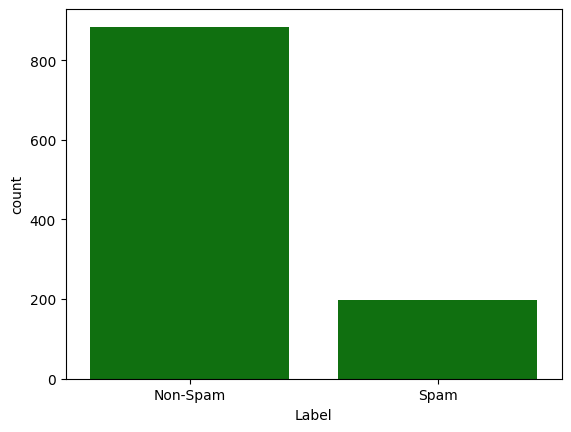

In [53]:
sns.countplot(x='Label',data=df,color='g')

In [54]:
df.isna().sum()

S. No.          0
Message_body    0
Label           0
dtype: int64

In [55]:
df.dtypes

S. No.           int64
Message_body    object
Label           object
dtype: object

In [56]:
df.columns

Index(['S. No.', 'Message_body', 'Label'], dtype='object')

In [57]:
df.drop(['S. No.'],axis=1,inplace=True)
df

,Message_body,Label
0,Rofl. Its true to its name,Non-Spam
1,The guy did some bitching but I acted like i'd...,Non-Spam
2,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,Will ü b going to esplanade fr home?,Non-Spam
4,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...
1077,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
1078,Try to do something dear. You read something f...,Non-Spam
1079,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
1080,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [58]:
df['Label']=df['Label'].map({'Spam':1,'Non-Spam':0})
df.dtypes

Message_body    object
Label            int64
dtype: object

In [59]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [60]:
msges=df.Message_body
msges

0                              Rofl. Its true to its name
1       The guy did some bitching but I acted like i'd...
2       Pity, * was in mood for that. So...any other s...
3                    Will ü b going to esplanade fr home?
4       This is the 2nd time we have tried 2 contact u...
                              ...                        
1077    7 wonders in My WORLD 7th You 6th Ur style 5th...
1078    Try to do something dear. You read something f...
1079    Sun ah... Thk mayb can if dun have anythin on....
1080    SYMPTOMS when U are in love: "1.U like listeni...
1081    Great. Have a safe trip. Dont panic surrender ...
Name: Message_body, Length: 1082, dtype: object

In [61]:
from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
msges=msges.apply(lambda x:tk.tokenize(x)).apply(lambda x: " ".join(x))
msges

0                             Rofl . Its true to its name
1       The guy did some bitching but I acted like i'd...
2       Pity , * was in mood for that . So ... any oth...
3                   Will ü b going to esplanade fr home ?
4       This is the 2nd time we have tried 2 contact u...
                              ...                        
1077    7 wonders in My WORLD 7th You 6th Ur style 5th...
1078    Try to do something dear . You read something ...
1079    Sun ah ... Thk mayb can if dun have anythin on...
1080    SYMPTOMS when U are in love : " 1 . U like lis...
1081    Great . Have a safe trip . Dont panic surrende...
Name: Message_body, Length: 1082, dtype: object

In [62]:
#REMOVE SPECIAL CHARACTERS
import re
msges=msges.str.replace('[^a-zA-Z0-9]',' ',regex=True)
msges

0                             Rofl   Its true to its name
1       The guy did some bitching but I acted like i d...
2       Pity     was in mood for that   So     any oth...
3                   Will   b going to esplanade fr home  
4       This is the 2nd time we have tried 2 contact u...
                              ...                        
1077    7 wonders in My WORLD 7th You 6th Ur style 5th...
1078    Try to do something dear   You read something ...
1079    Sun ah     Thk mayb can if dun have anythin on...
1080    SYMPTOMS when U are in love     1   U like lis...
1081    Great   Have a safe trip   Dont panic surrende...
Name: Message_body, Length: 1082, dtype: object

In [63]:
# #Tokens whose Length>=3 is collected
msges=msges.apply(lambda x: ' '.join([i for i in tk.tokenize(x) if len(i)>=3]))
msges

0                                  Rofl Its true its name
1       The guy did some bitching but acted like inter...
2            Pity was mood for that any other suggestions
3                               Will going esplanade home
4       This the 2nd time have tried contact have won ...
                              ...                        
1077    wonders WORLD 7th You 6th style 5th smile 4th ...
1078      Try something dear You read something for exams
1079    Sun Thk mayb can dun have anythin Thk have boo...
1080    SYMPTOMS when are love like listening songs ge...
1081        Great Have safe trip Dont panic surrender all
Name: Message_body, Length: 1082, dtype: object

In [64]:
# #Stemming
from nltk.stem import SnowballStemmer
stemer=SnowballStemmer('english')
msges=msges.apply(lambda x:[stemer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
msges

0                                    rofl it true it name
1       the guy did some bitch but act like interest b...
2                piti was mood for that ani other suggest
3                                   will go esplanad home
4       this the 2nd time have tri contact have won th...
                              ...                        
1077    wonder world 7th you 6th style 5th smile 4th p...
1078             tri someth dear you read someth for exam
1079    sun thk mayb can dun have anythin thk have boo...
1080    symptom when are love like listen song get sto...
1081          great have safe trip dont panic surrend all
Name: Message_body, Length: 1082, dtype: object

In [65]:
#Removing stop words
from nltk.corpus import stopwords
stop=stopwords.words('english')
msges=msges.apply(lambda x:[i for i in tk.tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))
msges

0                                          rofl true name
1       guy bitch act like interest buy someth els nex...
2                                   piti mood ani suggest
3                                        go esplanad home
4       2nd time tri contact 750 pound prize claim eas...
                              ...                        
1077    wonder world 7th 6th style 5th smile 4th perso...
1078                     tri someth dear read someth exam
1079    sun thk mayb dun anythin thk book lesson pilat...
1080    symptom love like listen song get stop see nam...
1081                   great safe trip dont panic surrend
Name: Message_body, Length: 1082, dtype: object

In [66]:
#vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
data=vec.fit_transform(msges)
data

<1082x2854 sparse matrix of type '<class 'numpy.float64'>'
	with 8924 stored elements in Compressed Sparse Row format>

In [67]:
print(data)

  (0, 1751)	0.5086856793431559
  (0, 2603)	0.5352804139572925
  (0, 2146)	0.6743246681420617
  (1, 1122)	0.1977601804079742
  (1, 1167)	0.32809784984076795
  (1, 2741)	0.22799692523276513
  (1, 1779)	0.26514476216742267
  (1, 972)	0.30392006451010634
  (1, 2331)	0.2751324774651613
  (1, 628)	0.2751324774651613
  (1, 1391)	0.3187189191538061
  (1, 1533)	0.2174075457753962
  (1, 353)	0.35437558793533497
  (1, 559)	0.3752334020731641
  (1, 1236)	0.26826339572857744
  (2, 2429)	0.5165656915002457
  (2, 418)	0.36716239650585775
  (2, 1708)	0.5469696796701571
  (2, 1930)	0.5469696796701571
  (3, 1308)	0.47434824349351795
  (3, 998)	0.7276196298199475
  (3, 1192)	0.4955435583228748
  (4, 2060)	0.24880867841085
  (4, 1756)	0.2883944867284856
  (4, 1674)	0.2570526577689625
  :	:
  (1079, 1852)	0.2706898396742334
  (1079, 1724)	0.2706898396742334
  (1079, 2434)	0.26153957460502464
  (1079, 1522)	0.24774213284441401
  (1079, 580)	0.2374366876682329
  (1079, 2524)	0.49548426568882803
  (1079, 1642

In [68]:
data.shape

(1082, 2854)

In [69]:
y=df['Label'].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.3,random_state=42)
y_train

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [71]:
#knn#naivebayes#svm#dt#rf
knn=KNeighborsClassifier()
sv=SVC()
nav=MultinomialNB()
dtree=DecisionTreeClassifier()
rforest=RandomForestClassifier()
lst=[knn,sv,nav,dtree,rforest]
for i in lst:
  print('Model started')
  print(i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print("Predicted value is: ",y_pred)
  cm=confusion_matrix(y_test,y_pred)
  print('Confusion matrix is: ')
  print(cm)
  score=accuracy_score(y_test,y_pred)
  print('Accuracy score is: ',score*100,'%')

Model started
KNeighborsClassifier()
Predicted value is:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Confusion matrix is: 
[[269   0]
 [ 52   4]]
Accuracy score is:  84.0 %
Model started
SVC()
Predicted value is:  [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0
 0 0 1 1 0 0 0 0 0 

In [72]:
#Random Forest Algorithm Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       269
           1       1.00      0.77      0.87        56

    accuracy                           0.96       325
   macro avg       0.98      0.88      0.92       325
weighted avg       0.96      0.96      0.96       325



# **Handling Imbalanced data using smote**

In [73]:
smote=SMOTE()
x_resampled,y_resampled=smote.fit_resample(data,y)


In [84]:
y_resampled_series = pd.Series(y_resampled)
value_counts = y_resampled_series.value_counts()

print(value_counts)

0    884
1    884
Name: count, dtype: int64


In [79]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x_resampled,y_resampled,test_size=0.3,random_state=42)

In [87]:
#knn#naivebayes#svm#dt#rf
knn=KNeighborsClassifier()
sv=SVC()
nav=MultinomialNB()
dtree=DecisionTreeClassifier()
rforest=RandomForestClassifier()
lst=[knn,sv,nav,dtree,rforest]
for i in lst:
  print('Model started')
  print(i)
  i.fit(x_train1,y_train1)
  y_pred1=i.predict(x_test1)
  print("Predicted value is: ",y_pred1)
  cm=confusion_matrix(y_test1,y_pred1)
  print('Confusion matrix is: ')
  print(cm)
  score=accuracy_score(y_test1,y_pred1)
  print('Accuracy score is: ',score*100,'%')
  print('Classification Report ')
  print(classification_report(y_test1,y_pred))

Model started
KNeighborsClassifier()
Predicted value is:  [1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1
 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1
 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1
 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1
 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0
 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1
 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0
 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1
 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1